<a href="https://colab.research.google.com/github/magdoch/ML_python_projects/blob/main/HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E_%D0%A1%D0%BE%D1%80%D0%BE%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
medical_df= pd.read_csv("/content/drive/MyDrive/Jypiter Project/medical-charges.csv")


**1.Метод МНК**

In [53]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [54]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [9]:
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [51]:
X = non_smoker_df["age"].to_numpy().reshape(-1,1)
y = non_smoker_df["charges"].to_numpy().reshape(-1,1)

In [11]:
n = X.shape[0]

In [12]:
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

In [13]:
def normal_equations(X,y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [14]:
MNK_coefs = normal_equations(X_with_intercept, y)

In [15]:
MNK_coefs

array([[-2091.42055657],
       [  267.24891283]])

In [16]:
np.dot(X_with_intercept[0], MNK_coefs)

array([2719.0598744])

In [17]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

In [18]:
def rmse(y_true, y_pred):
    return float(np.sqrt(np.mean((y_true - y_pred) ** 2)))

In [19]:
rmse_mnk = rmse(y, predictions_MNK)

In [20]:
predictions_MNK[:3], y[:3]

(array([[2719.0598744 ],
        [5391.54900271],
        [6727.79356686]]),
 array([[ 1725.5523 ],
        [ 4449.462  ],
        [21984.47061]]))

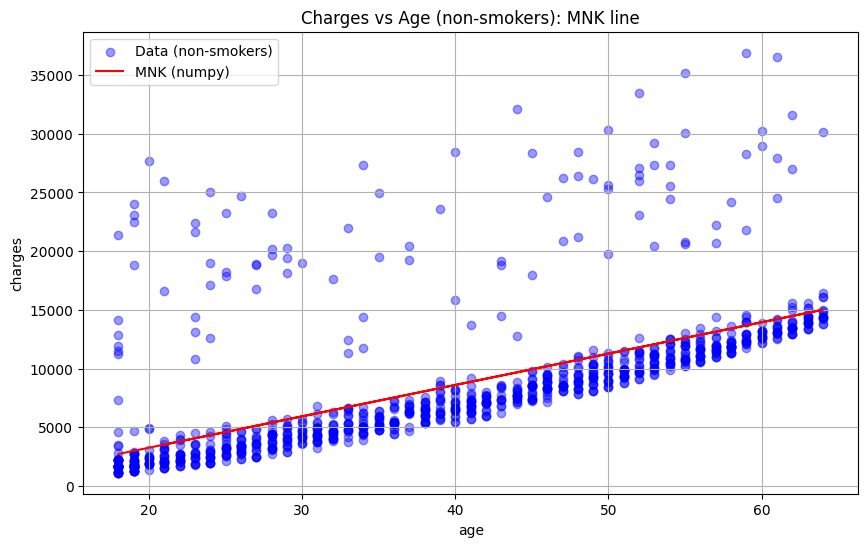

RMSE: 4662.51


In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.4, color='blue', label="Data (non-smokers)")
plt.plot(X, predictions_MNK, color='red', label="MNK (numpy)")
plt.xlabel("age")
plt.ylabel("charges")
plt.title("Charges vs Age (non-smokers): MNK line")
plt.legend()
plt.grid(True)
plt.show()
print(f"RMSE: {rmse_mnk:.2f}")

**2.Full-Batch градієнтного спуску з numpy**

In [22]:
def full_batch_gradient_descent(X, y, lr=0.01, epochs=100):
    m, b = 0.0, 0.0
    n = X.shape[0]
    errors = []
    for _ in range(epochs):
        y_pred = m * X + b
        error = y_pred - y
        errors.append(float(np.mean(error**2)))
        m_gradient = float((2/n) * np.sum(error * X))
        b_gradient = float((2/n) * np.sum(error))
        m -= lr * m_gradient
        b -= lr * b_gradient
    return m, b, errors


In [23]:
lrs = [0.001, 0.0001, 1e-6]
results = []

for lr in lrs:
  m, b, errors = full_batch_gradient_descent(X, y, lr=1e-6, epochs=2000)

predictions_fbgd = m * X + b
rmse_val = float(np.sqrt(np.mean((y - predictions_fbgd)**2)))
results.append({
        "lr": lr, "m": m, "b": b, "errors": errors, "rmse": rmse_val, "preds": predictions_fbgd
    })



In [24]:
print(f"lr={lr}, b(intercept)={b:.4f}, m(slope)={m:.4f}, RMSE={rmse_val:.2f}")


lr=1e-06, b(intercept)=4.0009, m(slope)=219.8712, RMSE=4715.55


In [34]:
def stochastic_gradient_descent(X, y, lr=0.001, epochs=100):
    m, b = 0.0, 0.0
    n = len(y)
    for _ in range(epochs):
        for i in range(n):
            x_i = X[i, 0]
            y_i = y[i]
            y_pred_i = m * x_i + b
            error_i = y_pred_i - y_i
            m_gradient = 2 * error_i * x_i
            b_gradient = 2 * error_i
            m -= lr * m_gradient
            b -= lr * b_gradient
    return m, b

m, b = stochastic_gradient_descent(X, y, lr=0.1, epochs=5000)
predictions_sgd = m * X[:, 0] + b

/tmp/ipython-input-1711786332.py:10: RuntimeWarning: overflow encountered in multiply
  m_gradient = 2 * error_i * x_i
/tmp/ipython-input-1711786332.py:12: RuntimeWarning: invalid value encountered in subtract
  m -= lr * m_gradient


In [37]:
best_result = min(results, key=lambda r: r["rmse"])

best_lr = best_result["lr"]
best_m  = best_result["m"]
best_b  = best_result["b"]
predictions_best = best_result["preds"]

rmse_best = best_result["rmse"]

print(f"Найкращий learning rate: {best_lr}")
print(f"RMSE для найкращого learning rate: {rmse_best:.2f}")
print(f"Коефіцієнти: b={best_b:.4f}, m={best_m:.4f}")

Найкращий learning rate: 1e-06
RMSE для найкращого learning rate: 4715.55
Коефіцієнти: b=4.0009, m=219.8712


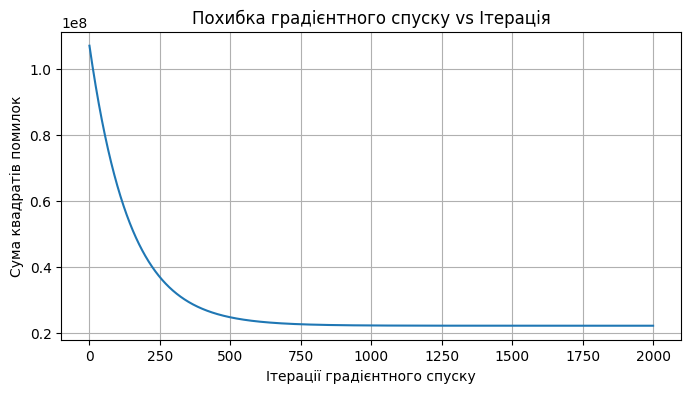

In [25]:
plt.figure(figsize=(8,4))
plt.plot(errors)
plt.xlabel("Ітерації градієнтного спуску")
plt.ylabel("Сума квадратів помилок")
plt.title("Похибка градієнтного спуску vs Ітерація")
plt.grid(True)
plt.show()

**3.з scikit-learn.LinearRegression**

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()


In [27]:
lin_reg

LinearRegression()

In [28]:
lin_reg.fit(X, y)

LinearRegression()

In [29]:
lin_reg.coef_, lin_reg.intercept_

(array([[267.24891283]]), array([-2091.42055657]))

In [30]:
predictions_sklearn = lin_reg.predict(X)

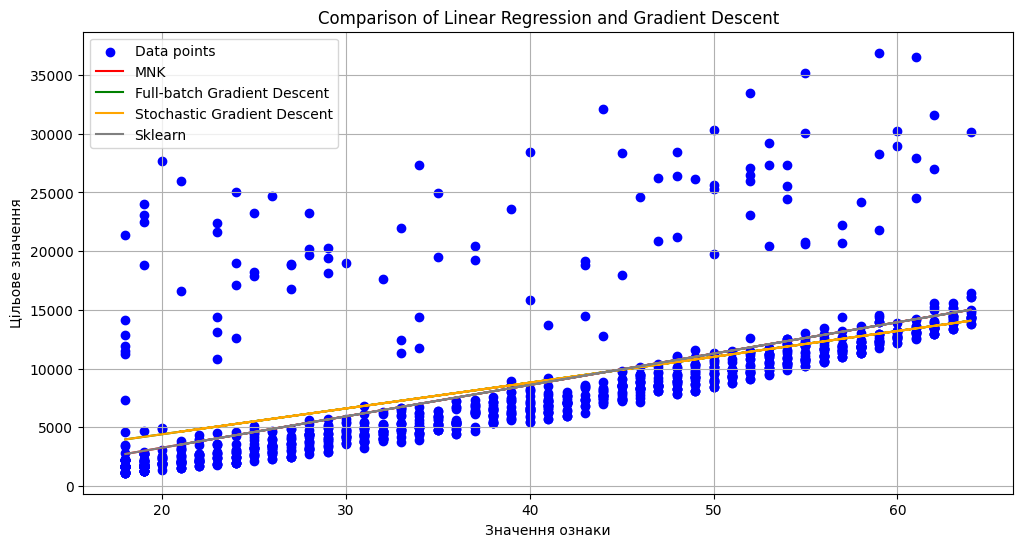

In [49]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd, color='green', label='Full-batch Gradient Descent')
plt.plot(X[:, 0], predictions_best, color='orange', label='Stochastic Gradient Descent')
plt.plot(X[:, 0], predictions_sklearn, color='grey', label='Sklearn')
plt.title('Comparison of Linear Regression and Gradient Descent')
plt.xlabel('Значення ознаки')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
print('Коефіцієнти з МНК: ', MNK_coefs)
print('Коефіцієнти з sklearn: ', lin_reg.intercept_, lin_reg.coef_)

Коефіцієнти з МНК:  [[-2091.42055657]
 [  267.24891283]]
Коефіцієнти з sklearn:  [-2091.42055657] [[267.24891283]]


In [48]:
from sklearn.metrics import mean_squared_error

print(f"RMSE МНК: {rmse_mnk:.2f}")
print(f"RMSE для найкращого learning rate: {rmse_best:.2f}")

rmse_sklearn = np.sqrt(mean_squared_error(y, predictions_sklearn))
print('RMSE sklearn: ', rmse_sklearn)

RMSE МНК: 4662.51
RMSE для найкращого learning rate: 4715.55
RMSE sklearn:  4662.505766636395


Висновок: усі методи (МНК, градієнтний спуск та sklearn.LinearRegression) дають майже однакову лінію регресії, що показує про коректність нашої реалізаціх реалізації. Загалом ми бачемо позитивну лінійну залежність між age та charges.

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [56]:
smoker_df = medical_df[medical_df["smoker"] == "yes"].copy()

X_smoker = smoker_df["age"]
y_smoker = smoker_df["charges"]

In [57]:
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [58]:
model_smoker = LinearRegression()
model_smoker.fit(X_smoker.to_frame(), y_smoker)

LinearRegression()

In [60]:
b_smoker = model_smoker.intercept_
m_smoker = model_smoker.coef_[0]

print(f"Коефіцієнт (b): {b_smoker:.2f}")
print(f"Зсув (m): {m_smoker:.2f}")

Коефіцієнт (b): 20294.13
Зсув (m): 305.24


In [61]:
predictions_smoker = model_smoker.predict(X_smoker.to_frame())

rmse_smoker = np.sqrt(
    np.mean((y_smoker.values - predictions_smoker) ** 2)
)

print(f"RMSE (smokers): {rmse_smoker:.2f}")

RMSE (smokers): 10711.00


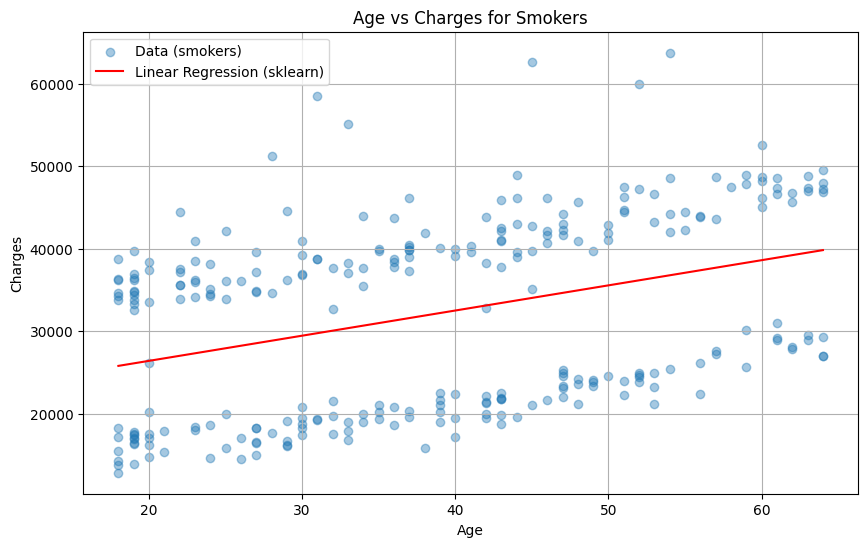

In [63]:

idx = np.argsort(X_smoker.values)
X_sorted = X_smoker.values[idx]
y_sorted = y_smoker.values[idx]

X_sorted_df = pd.DataFrame(X_sorted, columns=["age"])
y_line = model_smoker.predict(X_sorted_df)

plt.figure(figsize=(10, 6))
plt.scatter(X_smoker, y_smoker, alpha=0.4, label="Data (smokers)")
plt.plot(X_sorted, y_line, color="red", label="Linear Regression (sklearn)")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age vs Charges for Smokers")
plt.legend()
plt.grid(True)
plt.show()

Висновок: для курців спостерігається позитивна залежність між віком та медичними витратами, але розкид значень є дуже великим, думаю ця модель може бути швидше як пробна але не впевнена що варто використовувати її для реальних прогнозів.